In [23]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# MURA

In [24]:
import sys
sys.path.append("../../fastai/")

In [25]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from sklearn.metrics import confusion_matrix

In [26]:
PATH = "/home/sathiesh/Deep_Learning_Kaliy/my_projects/mura/data/"  #MMIV
#PATH = "/Users/Sathiesh/MachineLearning/Deep_Learning_Kaliy/my_projects/mura/data/" #Home

In [27]:
os.listdir(PATH)

['test_submission_example.csv',
 'models',
 'tmp',
 'MURA-v1.0',
 'valid.csv',
 'test',
 'cleaned_label.csv',
 'train.csv']

In [28]:
df_train = pd.read_csv(f'{PATH}train.csv')
df_valid = pd.read_csv(f'{PATH}valid.csv')

In [29]:
df_train.head()

,MURA-v1.0/train/XR_SHOULDER/patient00001/study1_positive/image1.png,1
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


In [30]:
df_train.columns = ['Image Index', 'Abnormality']

In [31]:
df_valid.columns = ['Image Index', 'Abnormality']

In [32]:
df_train.shape, df_valid.shape

((37110, 2), (3224, 2))

In [33]:
df = pd.concat([df_train, df_valid], ignore_index=True)
df.head()

,Image Index,Abnormality
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


In [34]:
df.shape

(40334, 2)

In [35]:
df['Abnormality'] = df['Abnormality'].astype('bool')

In [36]:
val_idxs = np.array(range(len(df_train), len(df)))

In [37]:
cleaned_label_path = f'{PATH}cleaned_label.csv'
df.to_csv(cleaned_label_path, index=False)

# View data

In [38]:
sz = 64
arch = dn169
bs = 16

In [39]:
def get_data(sz): 
    tfms = tfms_from_model(arch, sz, aug_tfms=RandomFlip())  #transforms_side_on
    return ImageClassifierData.from_csv(PATH ,'', cleaned_label_path , test_name='test',
                                       val_idxs=val_idxs, tfms=tfms, bs=bs);

In [40]:
data = get_data(sz)

In [41]:
fn = PATH+data.trn_ds.fnames[10]
fn 

'/home/sathiesh/Deep_Learning_Kaliy/my_projects/mura/data/MURA-v1.0/train/XR_ELBOW/patient00032/study1_negative/image2.png'

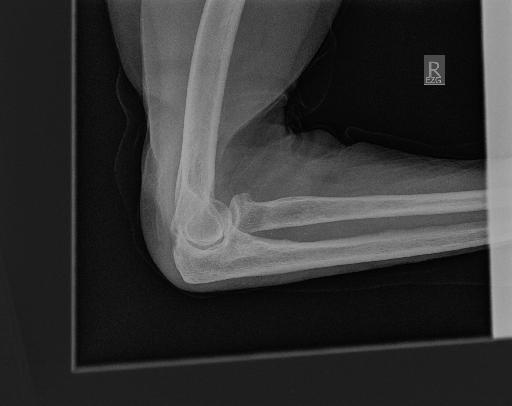

In [42]:
img = PIL.Image.open(fn);
img

In [43]:
data.trn_ds.fnames.shape ,data.val_ds.fnames.shape

((37110,), (3224,))

# Training

In [22]:
learn = ConvLearner.pretrained(arch, data, ps = 0.5, opt_fn=optim.Adam) 

 64%|██████▍   | 1493/2320 [01:03<00:35, 23.38it/s, loss=2.57] 

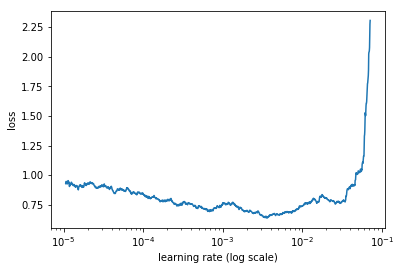

In [23]:
learn.lr_find()
learn.sched.plot()

In [25]:
lr = 0.00006

In [26]:
learn.fit(lr,3, cycle_len=1, cycle_mult =2) 

  9%|▊         | 202/2320 [00:08<01:33, 22.67it/s, loss=0.926]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.726866   0.585392   0.688586  
    1      0.657744   0.559925   0.719913                      
    2      0.655315   0.56361    0.725496                      
    3      0.619664   0.548664   0.726427                      
    4      0.58437    0.558297   0.716501                      
    5      0.587752   0.546904   0.730149                      
    6      0.581133   0.545426   0.730769                      



[array([0.54543]), 0.7307692307692307]

 65%|██████▍   | 1498/2320 [01:03<00:34, 23.73it/s, loss=2.26] 

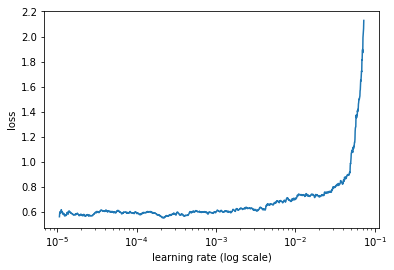

 65%|██████▍   | 1498/2320 [01:20<00:43, 18.72it/s, loss=2.26]

In [27]:
learn.lr_find()
learn.sched.plot()

In [28]:
lrs = [1e-5, 1e-4, 1e-3]
learn.unfreeze()

In [29]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  4%|▎         | 83/2320 [00:08<03:51,  9.68it/s, loss=0.635] 


Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.474726   0.502345   0.770471  
    1      0.493361   0.477301   0.783189                      
    2      0.452086   0.453433   0.796836                      
    3      0.487552   0.467174   0.793734                      
    4      0.45216    0.444623   0.80366                       
    5      0.390303   0.453462   0.801799                      
    6      0.380678   0.455485   0.810794                      



[array([0.45549]), 0.8107940446650124]

In [38]:
learn.save(f'{sz}')

NameError: name 'learn' is not defined

In [39]:
sz = 128

In [40]:
learn.set_data(get_data(sz))
learn.freeze()

NameError: name 'learn' is not defined

In [33]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.483775   0.507447   0.764888  
    1      0.4949     0.478756   0.781638                      
    2      0.477472   0.480896   0.782878                      
    3      0.460972   0.470247   0.786911                      
    4      0.432231   0.475768   0.784739                      
    5      0.463305   0.473429   0.787531                      
    6      0.457268   0.46426    0.788151                      



[array([0.46426]), 0.788151364764268]

In [34]:
learn.unfreeze();
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.436742   0.422028   0.809553  
    1      0.424692   0.440575   0.808313                      
    2      0.390111   0.405608   0.828164                      
    3      0.415887   0.415903   0.822891                      
    4      0.373197   0.423024   0.813586                      
    5      0.339331   0.41849    0.823201                      
    6      0.294181   0.429405   0.823821                      



[array([0.4294]), 0.8238213399503722]

In [35]:
learn.save(f'{sz}')

In [36]:
sz = 256

In [37]:
learn.set_data(get_data(sz))
learn.freeze() 

In [38]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.375443   0.42638    0.815757  
    1      0.380504   0.421823   0.816687                      
    2      0.364217   0.425054   0.816377                      
    3      0.372177   0.414594   0.820099                      
    4      0.353879   0.411145   0.82165                       
    5      0.345578   0.414124   0.819479                      
    6      0.397033   0.421337   0.818238                      



[array([0.42134]), 0.8182382133995038]

In [39]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
#Hvis ikke overfitting her: 
learn.save(f'{sz}')

epoch      trn_loss   val_loss   accuracy                      
    0      0.394719   0.406308   0.829094  
    1      0.360808   0.415623   0.831266                      
    2      0.314878   0.418063   0.829404                      
    3      0.346921   0.451096   0.814516                      
    4      0.329832   0.445283   0.815447                      
    5      0.252108   0.452899   0.819479                      
    6      0.220716   0.493245   0.819169                      



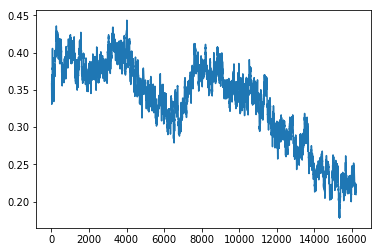

In [40]:
learn.sched.plot_loss()

# Transfer learning 

In [160]:
sz = 256
data = get_data(sz)

In [161]:
learnTL = ConvLearner.pretrained(arch, data, opt_fn=optim.Adam, ps = 0.5) 

In [162]:
learnTL.load('256169denne') #pretrained weights on chestX 14 dataset 

In [163]:
sz = 64

In [164]:
learnTL.set_data(get_data(sz))

 65%|██████▍   | 1507/2320 [06:06<03:17,  4.11it/s, loss=2.39] 

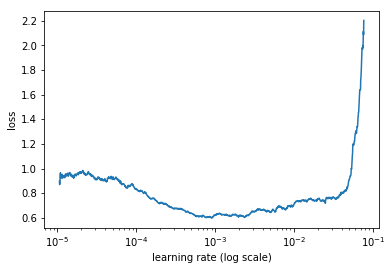

 65%|██████▍   | 1507/2320 [06:20<03:25,  3.97it/s, loss=2.39]

In [31]:
learnTL.lr_find()
learnTL.sched.plot()

In [165]:
lr = 0.0001

In [166]:
learnTL.fit(lr,3, cycle_len=1, cycle_mult =2) 

epoch      trn_loss   val_loss   accuracy                      
    0      0.638824   0.650284   0.614144  
    1      0.618198   0.619293   0.667804                      
    2      0.609348   0.625174   0.652916                      
    3      0.598371   0.605847   0.677109                      
    4      0.603961   0.595859   0.679591                      
    5      0.577768   0.593663   0.685174                      
    6      0.583338   0.602724   0.677109                      



[array([0.60272]), 0.6771091811414393]

 64%|██████▍   | 1492/2320 [01:01<00:34, 24.10it/s, loss=2.09] 

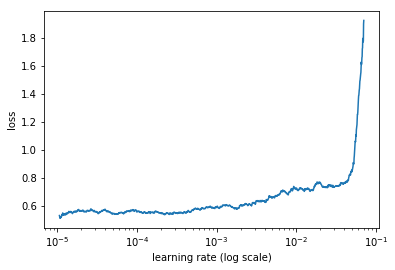

In [35]:
learnTL.lr_find()
learnTL.sched.plot()

In [36]:
lrs = [1e-6,1e-5,1e-4]
learnTL.unfreeze()

 64%|██████▍   | 1492/2320 [01:20<00:44, 18.65it/s, loss=2.09]

In [37]:
learnTL.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  4%|▍         | 97/2320 [00:09<03:44,  9.92it/s, loss=0.624]

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.555919   0.54902    0.718983  
    1      0.541897   0.511763   0.75062                       
    2      0.528557   0.508011   0.752792                      
    3      0.491262   0.494781   0.76706                       
    4      0.484842   0.481487   0.774194                      
    5      0.456572   0.483141   0.781948                      
    6      0.4538     0.490048   0.773573                      



[array([0.49005]), 0.7735732009925558]

In [48]:
learnTL.save(f'{sz}TL')

In [49]:
sz = 128

In [50]:
learnTL.set_data(get_data(sz))
learnTL.freeze()

In [51]:
learnTL.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.476185   0.505675   0.76768   
    1      0.496348   0.493133   0.770471                      
    2      0.511022   0.4918     0.771712                      
    3      0.499912   0.489452   0.771712                      
    4      0.49363    0.490948   0.777295                      
    5      0.515839   0.48453    0.776985                      
    6      0.472514   0.480123   0.780397                      



[array([0.48012]), 0.7803970223325062]

In [52]:
learnTL.unfreeze()
learnTL.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.476173   0.460966   0.792184  
    1      0.44152    0.454988   0.795596                      
    2      0.433333   0.438417   0.804591                      
    3      0.444149   0.43784    0.808002                      
    4      0.408513   0.427393   0.810174                      
    5      0.40887    0.427672   0.811414                      
    6      0.378122   0.428233   0.812965                      



[array([0.42823]), 0.8129652605459057]

In [53]:
learnTL.save(f'{sz}TL')

In [54]:
sz = 256

In [55]:
learnTL.set_data(get_data(sz))
learnTL.freeze()

In [56]:
learnTL.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.408713   0.435628   0.807072  
    1      0.432923   0.424575   0.815447                      
    2      0.38412    0.438535   0.806452                      
    3      0.420004   0.426124   0.815136                      
    4      0.400675   0.428186   0.813896                      
    5      0.406792   0.432969   0.813896                      
    6      0.408694   0.425518   0.817308                      



[array([0.42552]), 0.8173076923076923]

In [57]:
learnTL.save(f'{sz}TL')

In [58]:
learnTL.unfreeze()
learnTL.fit(lrs,3, cycle_len=1, cycle_mult=2)
#learnTL.save(f'{sz}TL') hvis den ikke overfitter

epoch      trn_loss   val_loss   accuracy                      
    0      0.417425   0.429765   0.810174  
    1      0.397376   0.413023   0.819169                      
    2      0.376462   0.415702   0.823821                      
    3      0.402058   0.429604   0.816998                      
    4      0.380335   0.428013   0.815757                      
    5      0.347093   0.431152   0.818859                      
    6      0.330658   0.450013   0.816067                      



[array([0.45001]), 0.8160669975186104]

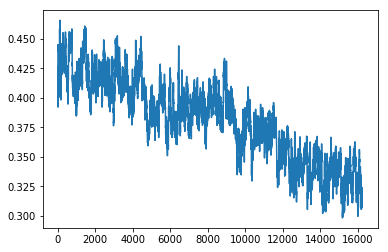

In [59]:
learnTL.sched.plot_loss()

# Prediction on test set

In [44]:
df_test = pd.read_csv(f'{PATH}test_submission_example.csv', header=None)

In [45]:
df_test.shape

(209, 2)

In [46]:
df_test.columns = ['Study','Abnormality']

In [47]:
df_test['Study'] = df_test['Study'].str.replace("/", "_")
df_test['Study'] = df_test['Study'].str.replace("test_","test/")

In [48]:
# maa lable y 
data.test_ds.y[:5] #alle er 0 

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [49]:
pos = 0; 
df_pos_img_indxs = {}
for stud in df_test['Study']: #eksempel: stud:  test/XR_FOREARM_patient12044_study1_
    indices = [i for i, s in enumerate(data.test_ds.fnames) if stud in s] #posisjonen til alle som 
    for j in indices:
        data.test_ds.y[j] = df_test['Abnormality'][pos]
    
    df_pos_img_indxs[pos] = indices
    pos= pos+1; 

In [50]:
data.test_ds.y[:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [51]:
len(df_pos_img_indxs)

209

In [52]:
df_pos_img_indxs[0]

[56, 186, 253]

In [425]:
log_preds,y = learnTL.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)
accuracy = accuracy_np(probs, y)

In [426]:
accuracy

0.7084078711985689

### Predict studies 

In [427]:
test_list = data.test_ds.fnames
len(test_list)

559

In [428]:
#fjerne imagex.png fra stringen, så man kan finne alle bildene for et studie
def searching_string(pasient_image_path):
    string_size = len(pasient_image_path) - len('image1.png')
    return pasient_image_path[:string_size] 

In [429]:
#finne indeksene til bildene som er med i studiet
def find_img_indxs(pasient_study): 
    return [test_list.index(i) for i in test_list if pasient_study in i]

In [430]:
trn_tfms, val_tfms = tfms_from_model(arch, sz) # get transformations
def predict_abnormality(fn): 
    im = open_image(fn)
    im_val = val_tfms(im)
    preds = learnTL.predict_array(im_val[None])
    return np.argmax(preds)

you should use the 2nd return val from tfms_from_model. The first one includes data augmentation, e.g. for the training set. For predictions you don’t want that, so use the 2nd one.
Jeremy

In [431]:
#fjerne indeksene til bildene fra test_list når man er ferdig med å predikere et studie. 
def del_indxs(study_img_indxs):
    #for i in study_img_indxs: 
       # del test_list[i] 
    return np.delete(test_list, study_img_indxs).tolist()

In [432]:
predictions_dict = {}

while(len(test_list)>0): 
    string_study = searching_string(test_list[0])
    study_img_indxs = find_img_indxs(string_study)
    
    prediction_list = [] #skal inneholde alle predikasjonene for et studie

    #Her skal det predikeres på hvert av bildene i studiet
    for i in study_img_indxs: 
        prediction = predict_abnormality(PATH+test_list[i])
        prediction_list.append(prediction)
        
    predictions_dict[string_study] = max(prediction_list) # nøkkel : navnet til studiet + value: predikasjonen (hvis en av de er True, så er studiet True)
    
    #ferdig med predikasjon for et studie
    test_list = del_indxs(study_img_indxs)
    #print(find_img_indxs(string_study)) #bare for å teste at alle listene som retuneres er tomme 

In [433]:
len(predictions_dict)

209

In [434]:
y = []
preds = []

In [435]:
def add_values(y_value, preds_value): 
    y.append(y_value)
    preds.append(preds_value)

In [436]:
def test_accuracy(pred_dict, df_test): 
    num_correct = 0; 
    for key, value in pred_dict.items(): 
        searching_string = key
        row = df_test.loc[df_test['Study'] == searching_string]
        print("Dictionary key: " + str(key) + " value: " + str(value))
        print(row.values[0][0],row.values[0][1])
        if(row.values[0][1] == value): 
            num_correct+=1
        
        add_values(row.values[0][1], value)
        print()
    return num_correct/len(pred_dict)

In [437]:
test_accuracy(predictions_dict, df_test)

Dictionary key: test/XR_SHOULDER_patient12168_study1_ value: 1
test/XR_SHOULDER_patient12168_study1_ 1

Dictionary key: test/XR_FINGER_patient12241_study1_ value: 1
test/XR_FINGER_patient12241_study1_ 1

Dictionary key: test/XR_ELBOW_patient12117_study1_ value: 1
test/XR_ELBOW_patient12117_study1_ 0

Dictionary key: test/XR_FOREARM_patient12056_study1_ value: 1
test/XR_FOREARM_patient12056_study1_ 0

Dictionary key: test/XR_SHOULDER_patient12183_study1_ value: 0
test/XR_SHOULDER_patient12183_study1_ 0

Dictionary key: test/XR_HAND_patient12092_study1_ value: 0
test/XR_HAND_patient12092_study1_ 1

Dictionary key: test/XR_FOREARM_patient12067_study1_ value: 0
test/XR_FOREARM_patient12067_study1_ 0

Dictionary key: test/XR_ELBOW_patient12124_study1_ value: 1
test/XR_ELBOW_patient12124_study1_ 1

Dictionary key: test/XR_HAND_patient12076_study1_ value: 0
test/XR_HAND_patient12076_study1_ 1

Dictionary key: test/XR_ELBOW_patient12128_study1_ value: 1
test/XR_ELBOW_patient12128_study1_ 0

Di

0.49760765550239233

In [441]:
cm = confusion_matrix(y,preds);

[[53 36]
 [69 51]]


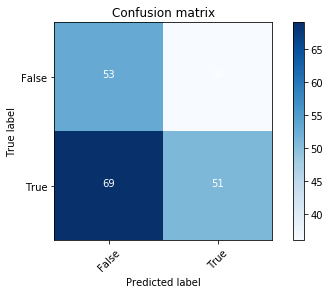

In [442]:
plot_confusion_matrix(cm, data.classes)